In [1]:
##Data from https://ssd.jpl.nasa.gov/tools/sbdb_query.html#!#results
##California Institute of Technology Jet Propulsion Laboratory. Small-Body Database Query. NASA.

In [2]:
import pandas as pd
import numpy as np

In [3]:
asteroids = pd.read_csv("asteroids.csv")

In [4]:
print(asteroids.head())
print(len(asteroids))

                  full_name  eccentricity  inclination (deg)  node (deg)  \
0        433 Eros (A898 PA)        0.2228              10.83      304.29   
1      719 Albert (A911 TB)        0.5470              11.58      183.86   
2      887 Alinda (A918 AA)        0.5707               9.40      110.42   
3    1036 Ganymed (A924 UB)        0.5330              26.69      215.50   
4      1221 Amor (1932 EA1)        0.4358              11.88      171.32   

   perihelion arg (deg)  perihelion distance (au)  aphelion distance (au)  \
0                178.93                     1.133                    1.78   
1                156.25                     1.195                    4.08   
2                350.48                     1.061                    3.88   
3                132.47                     1.245                    4.09   
4                 26.63                     1.083                    2.76   

   data_arc  condition_code  n_obs_used  absolute magnitude       n  \
0   46582

/tmp/ipykernel_722/1977642587.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(asteroids.corr(), annot=True)


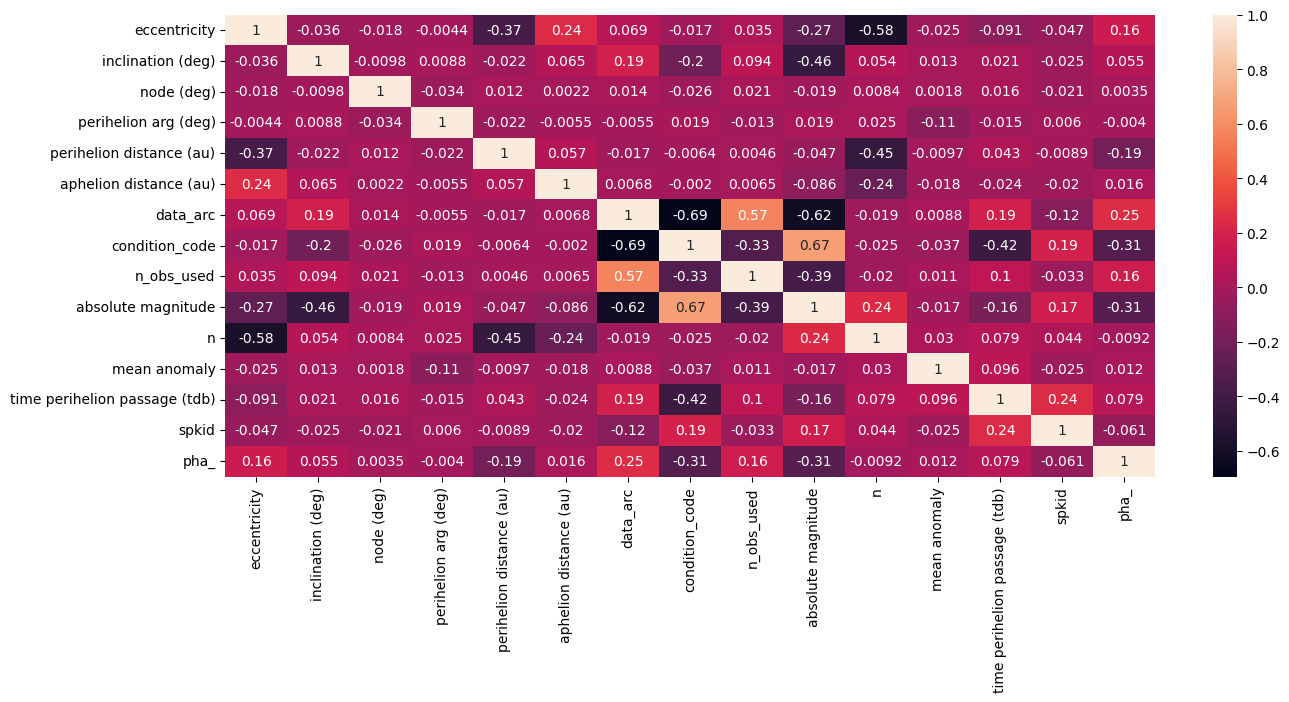

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.heatmap(asteroids.corr(), annot=True)
plt.show()

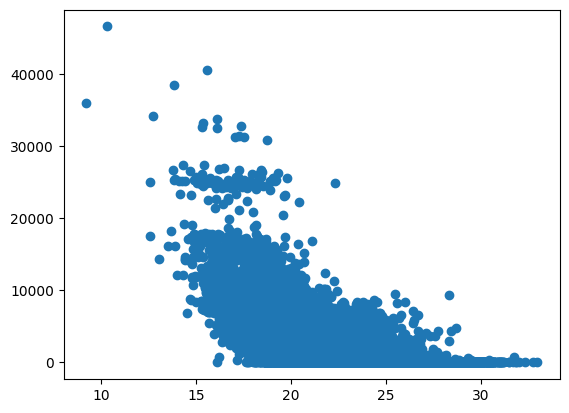

In [6]:
plt.scatter(y=asteroids["data_arc"], x = asteroids["absolute magnitude"])

In [7]:
asteroids["pha_"].value_counts()

0    29510
1     2339
Name: pha_, dtype: int64

In [8]:
print(2339/(2339+29510))

0.07344029639863105


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
X = asteroids.iloc[:, 1:len(asteroids.columns)-3]
print(X)

       eccentricity  inclination (deg)  node (deg)  perihelion arg (deg)  \
0            0.2228              10.83      304.29                178.93   
1            0.5470              11.58      183.86                156.25   
2            0.5707               9.40      110.42                350.48   
3            0.5330              26.69      215.50                132.47   
4            0.4358              11.88      171.32                 26.63   
...             ...                ...         ...                   ...   
31844        0.5384               8.28       70.74                149.08   
31845        0.6133              28.06       78.18                 33.49   
31846        0.5238               6.11       76.69                155.86   
31847        0.2650               9.35      245.22                328.86   
31848        0.6617               4.68      182.81                234.96   

       perihelion distance (au)  aphelion distance (au)  data_arc  \
0                 

In [11]:
y = asteroids["pha_"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [14]:
predict = logr.predict(X_test)

In [15]:
# number of correct predictions/number of predictions
print("LogR Score: ", logr.score(X_test, y_test))

# number of true positives / number of all positives (true and false positives sum)
# weighted average to account for unbalanced positives/negatives in data
print("Precision Score: ", metrics.precision_score(y_test, predict, average="weighted"))

# number of true positives / number of true positives + false negatives
print("Recall Score: ", metrics.recall_score(y_test, predict, average="weighted"))

LogR Score:  0.923600209314495
Precision Score:  0.8726844748737386
Recall Score:  0.923600209314495


In [16]:
matrix = metrics.confusion_matrix(y_test, predict)
print(matrix)

[[8816   62]
 [ 668    9]]


<AxesSubplot: >

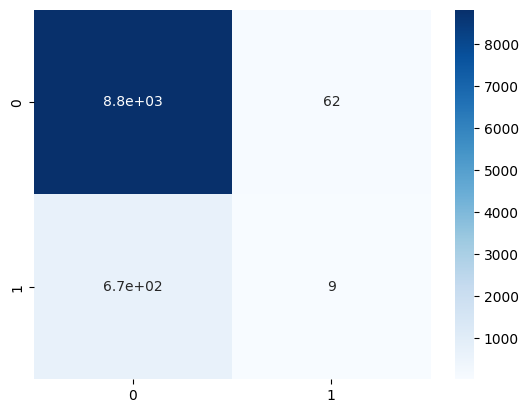

In [17]:
sns.heatmap(matrix, annot=True, cmap="Blues")

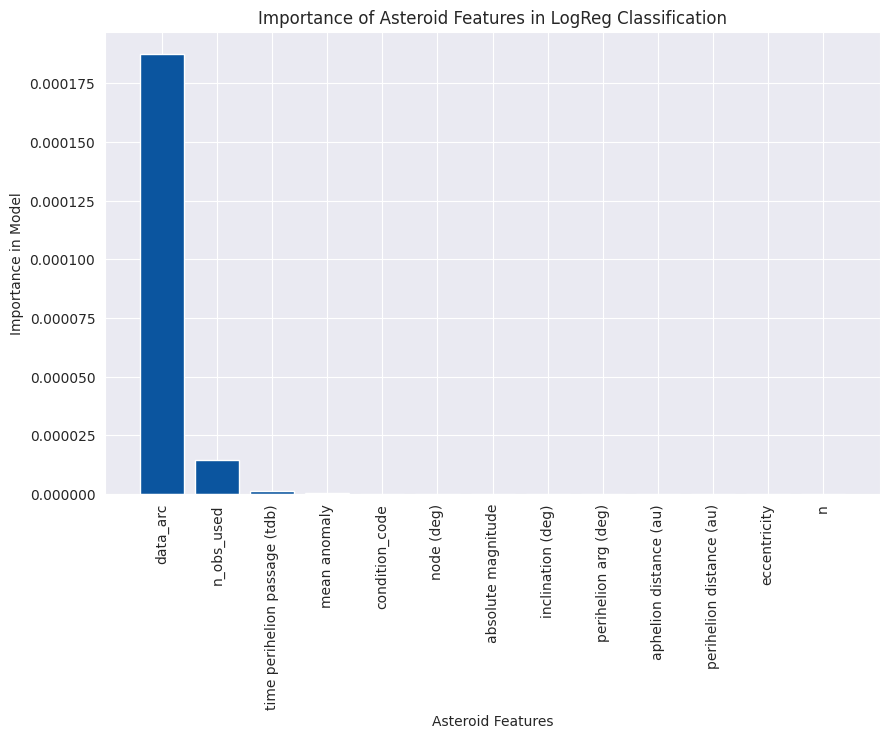

In [18]:
sns.set_style("darkgrid")
sns.set_palette("Blues_r")
importances = np.abs(logr.coef_[0])
# [::-1] puts the sorted list in reverse order
# importances is the measured importance, features is the features
left_sorted_importances = importances[importances.argsort()[::-1]]
left_sorted_features = X_train.columns[importances.argsort()[::-1]]

plt.figure(figsize=(10, 6))
plt.bar(left_sorted_features, left_sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Asteroid Features')
plt.ylabel('Importance in Model')
plt.title('Importance of Asteroid Features in LogReg Classification')
plt.show()